Processing file: trends_tracking_2024-07-08_15-11.json
Processing file: trends_tracking_2024-07-08_18-58.json
Processing file: trends_tracking_2024-07-08_23-11.json
Processing file: trends_tracking_2024-07-09_13-40.json
Processing file: trends_tracking_2024-07-09_21-54.json
Processing file: trends_tracking_2024-07-10_12-28.json


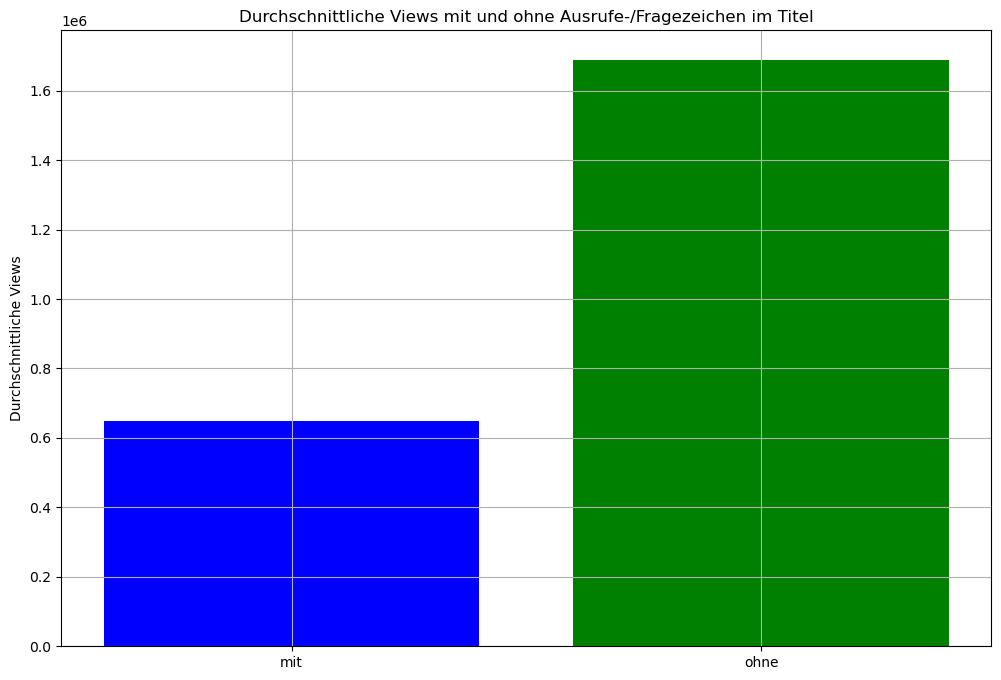

Anzahl der Videos mit "!" oder "?" im Titel: 10
Anzahl der Videos ohne "!" oder "?" im Titel: 32


In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

def load_data_from_folder(folder_path):
    all_videos = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                data = json.load(file)
                print(f'Found file: {file_path}')
                videos = data.get('videos', [])
                all_videos.extend(videos)

    return all_videos



def remove_duplicates(videos):
    seen = set()
    unique_videos = []
    for video in reversed(videos):
        video_url = video.get('video_url')
        if video_url not in seen:
            unique_videos.append(video)
            seen.add(video_url)
    return list(reversed(unique_videos))



# Entfernen von '.'
def clean_data(videos):
    for video in videos:
        video['views'] = int(video['views'].replace('.', '').replace(' ', ''))
        
        video['likes'] = int(video['likes'].replace('.', ''))
        video['dislikes'] = int(video['dislikes'].replace('.', ''))
        
        video['like_rate'] = round((video['likes'] / video['views']) * 100, 2)
        video['dislike_rate'] = round((video['dislikes'] / video['views']) * 100, 2)



def check_special_features(title):
    has_exclamation = '!' in title
    
    has_question = '?' in title
    
    return has_exclamation, has_question



def generate_plots(df):
    with_punctuation = df[(df['has_exclamation']) | (df['has_question'])]
    without_punctuation = df[~df['title'].str.contains('!|\?')]
    
    count_with_punctuation = len(with_punctuation)
    count_without_punctuation = len(without_punctuation)
    
    avg_views_with_punctuation = with_punctuation['views'].mean()
    avg_views_without_punctuation = without_punctuation['views'].mean()
    
    plt.figure(figsize=(12, 8))
    plt.bar(['mit', 'ohne'], [avg_views_with_punctuation, avg_views_without_punctuation], color=['blue', 'green'])
    plt.title('Durchschnittliche Views mit und ohne Ausrufe-/Fragezeichen im Titel')
    plt.ylabel('Durchschnittliche Views')
    plt.grid(True)
    plt.show()
    
    print(f'Anzahl der Videos mit "!" oder "?" im Titel: {count_with_punctuation}')
    print(f'Anzahl der Videos ohne "!" oder "?" im Titel: {count_without_punctuation}')
def main():
    folder_path = 'scraped_data/'
    all_videos = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            print(f'Processing file: {filename}')
            
            with open(file_path, 'r', encoding='utf-8') as file:
                data = json.load(file)
                videos = data.get('videos', [])

                unique_videos = remove_duplicates(videos)
                
                clean_data(unique_videos)
                
                all_videos.extend(unique_videos)
    
    all_videos = remove_duplicates(all_videos)
    df = pd.DataFrame(all_videos)
    
    df['has_exclamation'], df['has_question'] = zip(*df['title'].apply(check_special_features))
    
    generate_plots(df)

main()
